In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
lendingdata = pd.read_csv(r"C:\Users\nkjne\Desktop\IIIT Upgrad\Lending Club Case Study\loan\loan.csv")

C:\Users\nkjne\AppData\Local\Temp\ipykernel_24360\4187778335.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  lendingdata = pd.read_csv(r"C:\Users\nkjne\Desktop\IIIT Upgrad\Lending Club Case Study\loan\loan.csv")


In [5]:
correldata = lendingdata.corr(method='kendall')

C:\Users\nkjne\AppData\Local\Temp\ipykernel_24360\3973044082.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correldata = lendingdata.corr(method='kendall')


In [6]:
correldata.to_excel('output.xlsx', index=False)

## Next step is find out the correlation between the various columns. Highest correlations gives directions on the loan decisioning process & vice cersa if correlations are negative

In [7]:
correldata

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,1.000000,0.996720,0.074697,0.081660,0.158568,0.050495,0.029120,0.058296,-0.007774,-0.028584,...,NaN,NaN,NaN,NaN,-0.003082,NaN,NaN,NaN,NaN,NaN
member_id,0.996720,1.000000,0.074139,0.081129,0.157977,0.050085,0.028697,0.058442,-0.007577,-0.028774,...,NaN,NaN,NaN,NaN,-0.003084,NaN,NaN,NaN,NaN,NaN
loan_amnt,0.074697,0.074139,1.000000,0.972608,0.884890,0.852894,0.299744,0.050627,-0.030017,-0.002675,...,NaN,NaN,NaN,NaN,-0.027635,NaN,NaN,NaN,NaN,NaN
funded_amnt,0.081660,0.081129,0.972608,1.000000,0.908157,0.874417,0.296510,0.050471,-0.030028,-0.002865,...,NaN,NaN,NaN,NaN,-0.027979,NaN,NaN,NaN,NaN,NaN
funded_amnt_inv,0.158568,0.157977,0.884890,0.908157,1.000000,0.793383,0.278274,0.056211,-0.034331,-0.013311,...,NaN,NaN,NaN,NaN,-0.031791,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tax_liens,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
tot_hi_cred_lim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bal_ex_mort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_bc_limit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Bi variate Analysis - It has become clear that delinquencies in the last 2 years has a significant impact. Focus on delinq_2yrs

In [8]:
lendingdata['funded_amnt'].corr(lendingdata['delinq_2yrs'])

-0.03235520158031154

## visualisations to understand the data a bit more in detail

C:\Users\nkjne\AppData\Local\Temp\ipykernel_24360\4163411065.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(loan_amount, ax=ax[0], color='#000000')
C:\Users\nkjne\AppData\Local\Temp\ipykernel_24360\4163411065.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(funded_amount, ax=ax[1])


Text(0.5, 1.0, 'Amount Funded by the Lender')

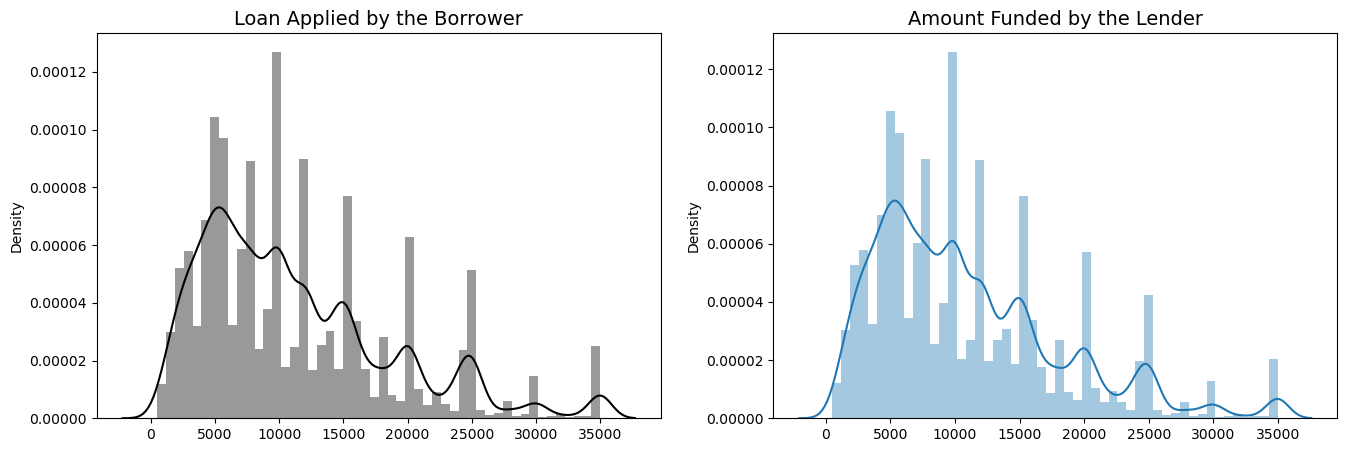

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,5))
# Making a plot with 2 subplots

loan_amount = lendingdata["loan_amnt"].values
funded_amount = lendingdata["funded_amnt"].values


sns.distplot(loan_amount, ax=ax[0], color='#000000')
ax[0].set_title("Loan Applied by the Borrower", fontsize=14)
sns.distplot(funded_amount, ax=ax[1])
ax[1].set_title("Amount Funded by the Lender", fontsize=14)
# Distribution plots

# Loan applied for and loan funded have same distribution, meaning most loans were accepted